# Assessment 8 ETL Report


## Introduction
The United States is a country with broad demographics and thriving business culture. To investigate whether demographics and businesses correlate in the US, survey data by the United States Census Bureau needs to be tranformed into information. Cleaning and normalizing the data allows for better analysis and visualizations where patterns may be observed. This report details the steps necessary to obtain usable data from the surveys conducted from 2018 to 2020. 
## Data Sources
The survey data is on the US Census website. The site was accessed on April 19, 2023. 
>   Bureau, U. C. (n.d.). Annual Business Survey (ABS) APIs. Census.gov. Retrieved April 20, 2023, from https://www.census.gov/data/developers/data-sets/ abs.2019.html

## Extraction
The survey data was accessed through the US Census Bureau API. In order to perform the extraction, we imported pandas and requests library. We performed GET requests for each of the desired years' API using strings to represent their respective years. 

In [1]:
import pandas as pd
import requests
url_2018 = f'https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'
url_2019 = f'https://api.census.gov/data/2019/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'
url_2020 = f'https://api.census.gov/data/2020/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'

response_2018 = requests.get(url_2018)
response_2019 = requests.get(url_2019)
response_2020 = requests.get(url_2020)

We transformed the GET requests into JSON for each year. 

In [2]:
 # get JSON object from response
json_2018 = response_2018.json()
json_2019 = response_2019.json()
json_2020 = response_2020.json()

We used the resulting JSON objects to create DataFrames. 

## Transformation
We transformed the first row in the DataFrames into the header row to allow us to have column names and the names would not be counted as data. Next, we dropped the duplicate header row. We renamed the columns in the three DataFrames to more descriptive names to help us understand what we are looking at. We filtered the columns in the DataFrames to the columns that were relevant to our objectives. We then added a year column so that we could concatenate the three DataFrames and still reference the year. To use certain categories in the columns, we filtered the rows in each DataFrame to include the most meaningful information for our objectives.

In [3]:
# create DataFrame from JSON object
df_18 = pd.DataFrame(json_2018)
df_19 = pd.DataFrame(json_2019)
df_20 = pd.DataFrame(json_2020)

#  promote headers
df_18.columns = df_18.iloc[0]
df_19.columns = df_19.iloc[0]
df_20.columns = df_20.iloc[0]

# drop original header row
df_18.drop([0], inplace=True)
df_19.drop([0], inplace=True)
df_20.drop([0], inplace=True)


# Rename Columns
df_18 = df_18.rename(columns={'ETH_GROUP' : 'Ethnicity code',
                        'NAME':'Name','NAICS2017_LABEL':'NAICS2017 label',
                        'SEX_LABEL':'Sex label','ETH_GROUP_LABEL': 'Ethnicity code label',
                        'PAYANN':'Annual payroll', 'FIRMPDEMP': 'Number of employer firms',
                        'RCPPDEMP':'Sales','EMP':'Number of employees','EMPSZFI':'Employment size of firms code',
                        'RACE_GROUP_LABEL':'Race group label'})

df_19 = df_19.rename(columns={'ETH_GROUP' : 'Ethnicity code',
                        'NAME':'Name','NAICS2017_LABEL':'NAICS2017 label',
                        'SEX_LABEL':'Sex label','ETH_GROUP_LABEL': 'Ethnicity code label',
                        'PAYANN':'Annual payroll', 'FIRMPDEMP': 'Number of employer firms',
                        'RCPPDEMP':'Sales','EMP':'Number of employees','EMPSZFI':'Employment size of firms code',
                        'RACE_GROUP_LABEL':'Race group label'})

df_20 = df_20.rename(columns={'ETH_GROUP' : 'Ethnicity code',
                        'NAME':'Name','NAICS2017_LABEL':'NAICS2017 label',
                        'SEX_LABEL':'Sex label','ETH_GROUP_LABEL': 'Ethnicity code label',
                        'PAYANN':'Annual payroll', 'FIRMPDEMP': 'Number of employer firms',
                        'RCPPDEMP':'Sales','EMP':'Number of employees','EMPSZFI':'Employment size of firms code',
                        'RACE_GROUP_LABEL':'Race group label'})
# Filter Columns
df_18 = df_18[['NAICS2017 label','Sex label','Ethnicity code label',
        'Race group label', 'Annual payroll', 'Number of employer firms', 'Sales', 
        'Number of employees', 'Employment size of firms code']]

df_19 = df_19[['NAICS2017 label','Sex label','Ethnicity code label',
        'Race group label', 'Annual payroll', 'Number of employer firms', 'Sales', 
        'Number of employees', 'Employment size of firms code']]

df_20 = df_20[['NAICS2017 label','Sex label','Ethnicity code label',
        'Race group label', 'Annual payroll', 'Number of employer firms', 'Sales', 
        'Number of employees', 'Employment size of firms code']]

df_18['Year'] = 2018
df_19['Year'] = 2019
df_20['Year'] = 2020

After we added the year column to the three DataFrames with their respective years. We concatenated the three DataFrames to the final DataFrame, df_merge.

In [4]:
all_df = [df_18,df_19,df_20]
df_merge = pd.concat(all_df, ignore_index=True)

 Additionally, we converted the datatypes of columns that has numbers we used from objects to integers.

In [5]:
df_merge['Annual payroll'] = df_merge['Annual payroll'].astype('int64')
df_merge['Number of employees'] = df_merge['Number of employees'].astype('int64')
df_merge['Sales'] = df_merge['Sales'].astype('int64')

## Load
After the transformation, the final DataFrame that was used to create visualizations is df_merge.

## Conclusion
By following these steps, we are able to extract the needed data from our sources and transform the data so it is clean and ready to be analyzed. The data is now ready to be analyzed and can be visualized using Matplotlib, Plotly or other packages and draw conclusions from the data.

C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\3753572085.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,p(x),"r--",color=trendColor, alpha = 0.6)


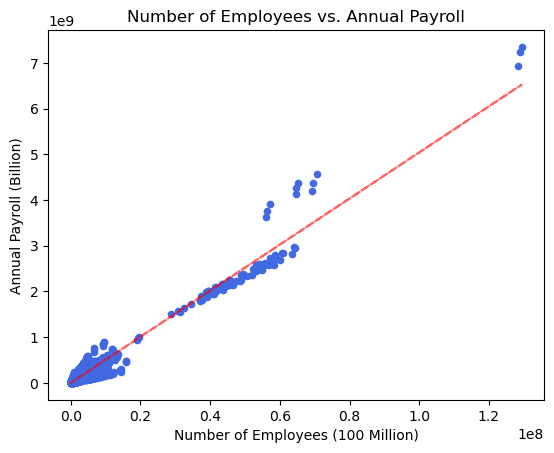

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import min
from numpy import max

desiredColor="royalblue"
trendColor="red"

x = df_merge['Number of employees']
y = df_merge['Annual payroll']

ax = df_merge.plot(title = 'Number of Employees vs. Annual Payroll', kind='scatter', x='Number of employees',y='Annual payroll',color=desiredColor)
ax.set_xlabel('Number of Employees (100 Million)')
ax.set_ylabel('Annual Payroll (Billion)')
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color=trendColor, alpha = 0.6)
plt.show()

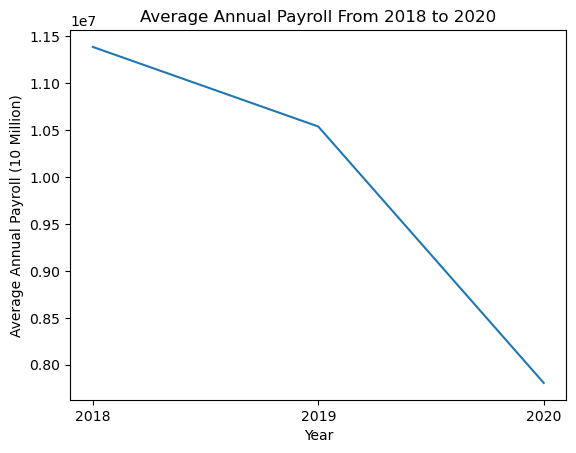

In [7]:
payroll_avg_2018 = df_merge[df_merge['Year'] == 2018]
payroll_avg_2019 = df_merge[df_merge['Year'] == 2019]
payroll_avg_2020 = df_merge[df_merge['Year'] == 2020]

payroll_avg_2018 = payroll_avg_2018['Annual payroll'].mean()
payroll_avg_2019 = payroll_avg_2019['Annual payroll'].mean()
payroll_avg_2020 = payroll_avg_2020['Annual payroll'].mean()

x = np.array(['2018','2019','2020'])
y = payroll_avg_2018,payroll_avg_2019,payroll_avg_2020

plt.plot(x, y)
plt.xlabel("Year")
plt.ylabel("Average Annual Payroll (10 Million)")
plt.title("Average Annual Payroll From 2018 to 2020")
plt.show()

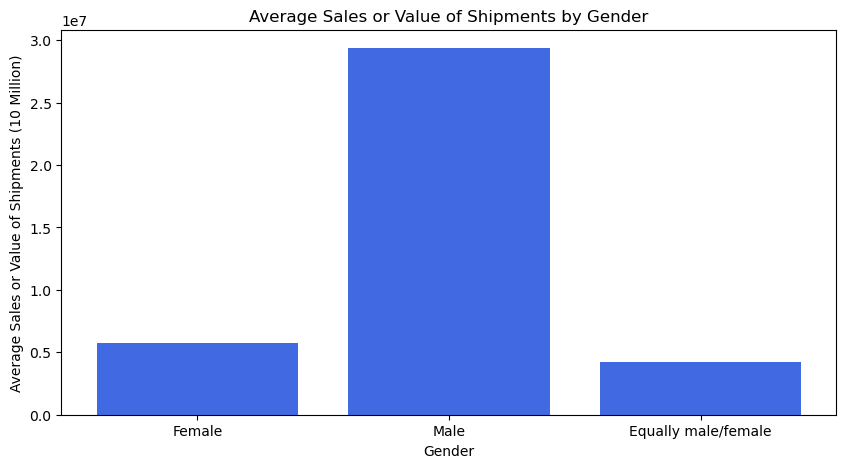

In [8]:
female_sales = df_merge[df_merge['Sex label'] == 'Female']
male_sales = df_merge[df_merge['Sex label'] == 'Male']
male_female_sales = df_merge[df_merge['Sex label'] == 'Equally male/female']

female_sales = female_sales['Sales'].mean()
male_sales = male_sales['Sales'].mean()
male_female_sales = male_female_sales['Sales'].mean()

avg_sales = female_sales,male_sales,male_female_sales

sex_label = df_merge[(df_merge['Sex label'] == 'Male') | (df_merge['Sex label'] == 'Female') | (df_merge['Sex label'] == 'Equally male/female')]

fig = plt.figure(figsize = (10, 5))

plt.bar(sex_label['Sex label'].unique(),avg_sales, color ='royalblue')

plt.xlabel("Gender")
plt.ylabel("Average Sales or Value of Shipments (10 Million)")
plt.title("Average Sales or Value of Shipments by Gender")
plt.show()

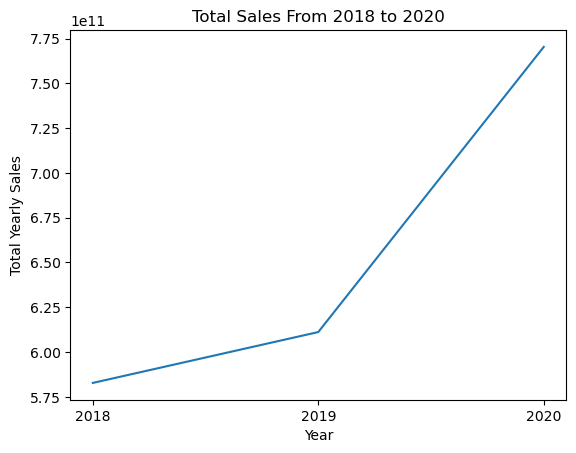

In [9]:
df_2018 = df_merge[df_merge['Year'] == 2018]
df_2019 = df_merge[df_merge['Year'] == 2019]
df_2020 = df_merge[df_merge['Year'] == 2020]

df_2018_totals = df_2018[df_2018['NAICS2017 label'] == 'Total for all sectors']
df_2019_totals = df_2019[df_2019['NAICS2017 label'] == 'Total for all sectors']
df_2020_totals = df_2020[df_2020['NAICS2017 label'] == 'Total for all sectors']

df_2018_sales_total = df_2018_totals['Sales'].sum()
df_2019_sales_total = df_2019_totals['Sales'].sum()
df_2020_sales_total = df_2020_totals['Sales'].sum()

x = np.array(['2018','2019','2020'])
y = df_2018_sales_total,df_2019_sales_total,df_2020_sales_total

plt.plot(x, y)
plt.xlabel("Year")
plt.ylabel("Total Yearly Sales")
plt.title("Total Sales From 2018 to 2020")
plt.show()

C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\2459352576.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018_male = df_2018_totals[df_2018['Sex label'] == 'Male']
C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\2459352576.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2019_male = df_2019_totals[df_2019['Sex label'] == 'Male']
C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\2459352576.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2020_male = df_2020_totals[df_2020['Sex label'] == 'Male']
C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\2459352576.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018_female = df_2018_totals[df_2018['Sex label'] == 'Female']
C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\2459352576.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_

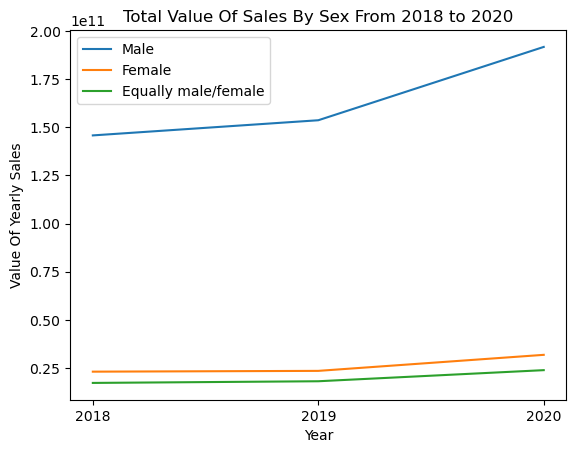

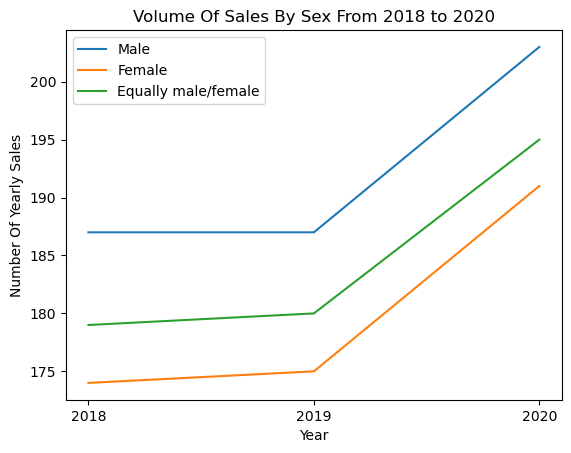

In [10]:
df_2018_male = df_2018_totals[df_2018['Sex label'] == 'Male']
df_2019_male = df_2019_totals[df_2019['Sex label'] == 'Male']
df_2020_male = df_2020_totals[df_2020['Sex label'] == 'Male']

df_2018_female = df_2018_totals[df_2018['Sex label'] == 'Female']
df_2019_female = df_2019_totals[df_2019['Sex label'] == 'Female']
df_2020_female = df_2020_totals[df_2020['Sex label'] == 'Female']

df_2018_equal = df_2018_totals[df_2018['Sex label'] == 'Equally male/female']
df_2019_equal = df_2019_totals[df_2019['Sex label'] == 'Equally male/female']
df_2020_equal = df_2020_totals[df_2020['Sex label'] == 'Equally male/female']

x = np.array(['2018','2019','2020'])
y_male_sum = df_2018_male['Sales'].sum(), df_2019_male['Sales'].sum(), df_2020_male['Sales'].sum()
y_female_sum = df_2018_female['Sales'].sum(), df_2019_female['Sales'].sum(),  df_2020_female['Sales'].sum()
y_equal_sum = df_2018_equal['Sales'].sum(), df_2019_equal['Sales'].sum(), df_2020_equal['Sales'].sum()

y_male_count =  df_2018_male['Sales'].count(), df_2019_male['Sales'].count(), df_2020_male['Sales'].count()
y_female_count = df_2018_female['Sales'].count(), df_2019_female['Sales'].count(), df_2020_female['Sales'].count()
y_equal_count = df_2018_equal['Sales'].count(), df_2019_equal['Sales'].count(), df_2020_equal['Sales'].count()

plt.plot(x, y_male_sum, label = 'Male')
plt.plot(x, y_female_sum, label = 'Female')
plt.plot(x, y_equal_sum, label = 'Equally male/female')
plt.xlabel("Year")
plt.ylabel("Value Of Yearly Sales")
plt.title("Total Value Of Sales By Sex From 2018 to 2020")
plt.legend()
plt.show()

plt.plot(x, y_male_count, label = 'Male')
plt.plot(x, y_female_count, label = 'Female')
plt.plot(x, y_equal_count, label = 'Equally male/female')
plt.xlabel("Year")
plt.ylabel("Number Of Yearly Sales")
plt.title("Volume Of Sales By Sex From 2018 to 2020")
plt.legend()
plt.show()

In [11]:
df_2018_white = df_2018_totals[df_2018['Race group label'] == 'White']
df_2019_white = df_2019_totals[df_2019['Race group label'] == 'White']
df_2020_white = df_2020_totals[df_2020['Race group label'] == 'White']

df_2018_black = df_2018_totals[df_2018['Race group label'] == 'Black or African American']
df_2019_black = df_2019_totals[df_2019['Race group label'] == 'Black or African American']
df_2020_black = df_2020_totals[df_2020['Race group label'] == 'Black or African American']

df_2018_ai = df_2018_totals[df_2018['Race group label'] == 'American Indian and Alaska Native']
df_2019_ai = df_2019_totals[df_2019['Race group label'] == 'American Indian and Alaska Native']
df_2020_ai = df_2020_totals[df_2020['Race group label'] == 'American Indian and Alaska Native']

df_2018_asian = df_2018_totals[df_2018['Race group label'] == 'Asian']
df_2019_asian = df_2019_totals[df_2019['Race group label'] == 'Asian']
df_2020_asian = df_2020_totals[df_2020['Race group label'] == 'Asian']

df_2018_nhpi = df_2018_totals[df_2018['Race group label'] == 'Native Hawaiian and Other Pacific Islander']
df_2019_nhpi = df_2019_totals[df_2019['Race group label'] == 'Native Hawaiian and Other Pacific Islander']
df_2020_nhpi = df_2020_totals[df_2020['Race group label'] == 'Native Hawaiian and Other Pacific Islander']

df = pd.DataFrame(dict(
    Year = [2018, 2019, 2020],
    white = [df_2018_white['Sales'].sum(), df_2019_white['Sales'].sum(), df_2020_white['Sales'].sum()],
    black = [df_2018_black['Sales'].sum(), df_2019_black['Sales'].sum(), df_2020_black['Sales'].sum()],
    ai = [df_2018_ai['Sales'].sum(), df_2019_ai['Sales'].sum(), df_2020_ai['Sales'].sum()],
    asian = [df_2018_asian['Sales'].sum(), df_2019_asian['Sales'].sum(), df_2020_asian['Sales'].sum()],
    nhpi = [df_2018_nhpi['Sales'].sum(),df_2019_nhpi['Sales'].sum(),df_2020_nhpi['Sales'].sum()]
))

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Year'], y=df['white'], name='White', mode='lines'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['black'], name='Black', mode='lines'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['ai'], name='American Indian and Alaska Native', mode='lines'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['asian'], name='Asian', mode='lines'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['nhpi'], name='Native Hawaiian and Other Pacific Islander ', mode='lines'))

fig.update_layout(title='Total Sales By Owner Race Group (2018-2020)', xaxis_title='Year', yaxis_title='Total Yearly Sales')
fig.show()

df2 = pd.DataFrame(dict(
    Year = [2018, 2019, 2020],
    white = [df_2018_white['Sales'].count(), df_2019_white['Sales'].count(), df_2020_white['Sales'].count()],
    black = [df_2018_black['Sales'].count(), df_2019_black['Sales'].count(), df_2020_black['Sales'].count()],
    ai = [df_2018_ai['Sales'].count(), df_2019_ai['Sales'].count(), df_2020_ai['Sales'].count()],
    asian = [df_2018_asian['Sales'].count(), df_2019_asian['Sales'].count(), df_2020_asian['Sales'].count()],
    nhpi = [df_2018_nhpi['Sales'].count(), df_2019_nhpi['Sales'].count(), df_2020_nhpi['Sales'].count()]
))

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df2['Year'], y=df2['white'], name='White', mode='lines'))
fig2.add_trace(go.Scatter(x=df2['Year'], y=df2['black'], name='Black', mode='lines'))
fig2.add_trace(go.Scatter(x=df2['Year'], y=df2['ai'], name='American Indian and Alaska Native', mode='lines'))
fig2.add_trace(go.Scatter(x=df2['Year'], y=df2['asian'], name='Asian', mode='lines'))
fig2.add_trace(go.Scatter(x=df2['Year'], y=df2['nhpi'], name='Native Hawaiian and Other Pacific Islander ', mode='lines'))

fig2.update_layout(title='Volume of Sales By Owner Race Group (2018-2020)', xaxis_title='Year', yaxis_title='Count of Yearly Sales')
fig2.show()

C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\1755931501.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018_white = df_2018_totals[df_2018['Race group label'] == 'White']
C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\1755931501.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2019_white = df_2019_totals[df_2019['Race group label'] == 'White']
C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\1755931501.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2020_white = df_2020_totals[df_2020['Race group label'] == 'White']
C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\1755931501.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018_black = df_2018_totals[df_2018['Race group label'] == 'Black or African American']
C:\Users\SamuelMoe\AppData\Local\Temp\ipykernel_26376\1755931501.py:6: UserWarning: Boolean Series k

In [12]:
keep_list_sex = ['Female', 'Male', 'Equally male/female']
keep_list_race = ['White', 'Black or African American',
                  'American Indian and Alaska Native', 'Asian',
                  'Native Hawaiian and Other Pacific Islander', 'Minority',
                  'Equally minority/nonminority', 'Nonminority']
keep_list_ethnicity = ['Hispanic', 'Non-Hispanic', 'Equally Hispanic/non-Hispanic']

df_merge = df_merge[(df_merge['Sex label'].isin(keep_list_sex)) &
(df_merge['Race group label'].isin(keep_list_race)) &
(df_merge['Ethnicity code label'].isin(keep_list_ethnicity)) &
(df_merge['NAICS2017 label'] != 'Total for all sectors')]

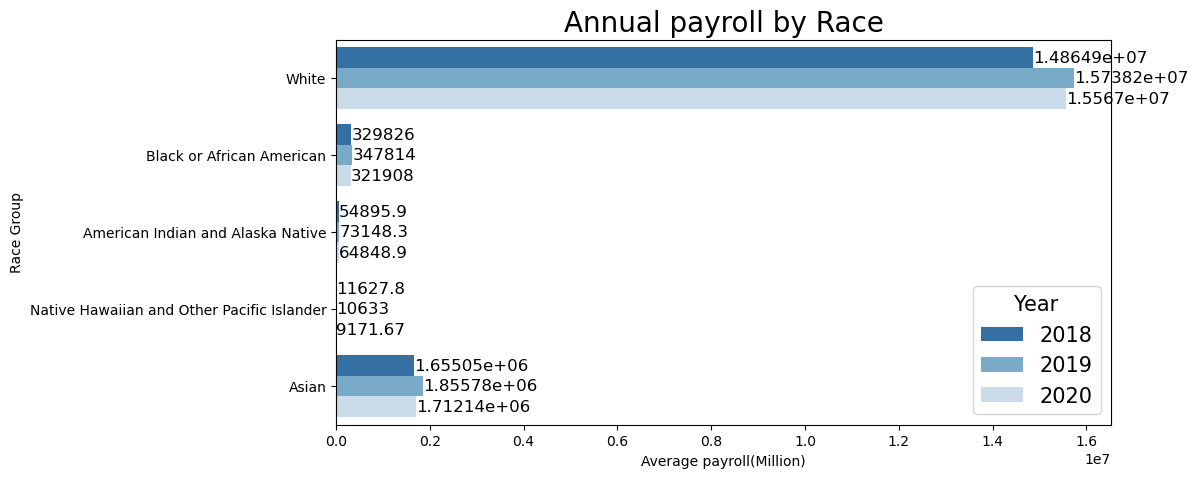

In [13]:
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x = df_merge['Annual payroll'],
            y = df_merge['Race group label'],
            hue = df_merge['Year'],
            orient='h',
            estimator=mean,
            ci=None,
            palette='Blues_r'
            ).set(xlabel='Average payroll(Million)',
                  ylabel='Race Group')

for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=12)
ax.set_title('Annual payroll by Race', fontsize=20)
ax.legend(title='Year', fontsize=15, title_fontsize=15)

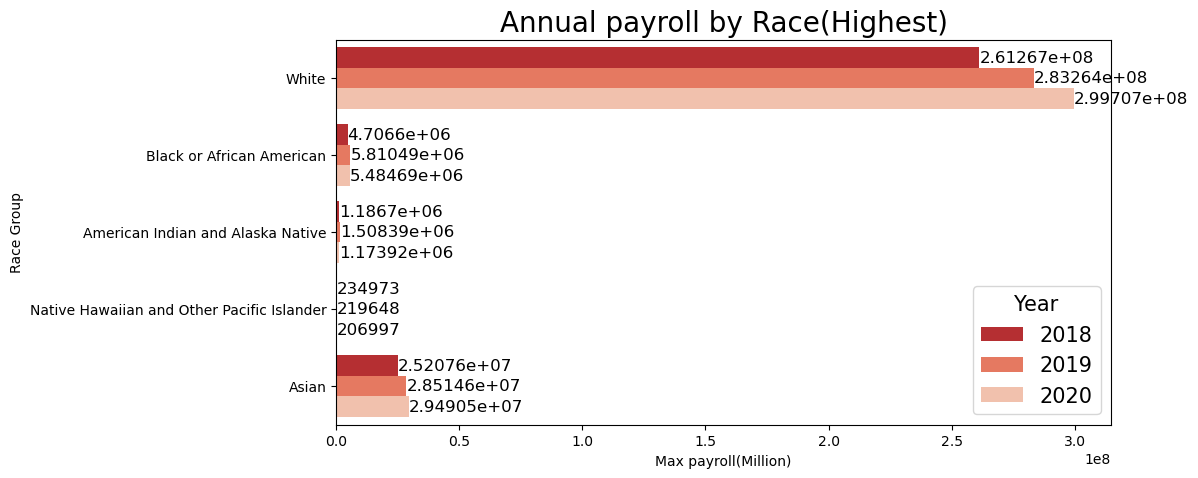

In [14]:
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x = df_merge['Annual payroll'],
            y = df_merge['Race group label'],
            hue = df_merge['Year'],
            estimator=max,
            ci=None,
            orient='h',
            palette='Reds_r'
            ).set(xlabel='Max payroll(Million)',
                  ylabel='Race Group')

for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=12)
ax.set_title('Annual payroll by Race(Highest)', fontsize=20)
ax.legend(title='Year', fontsize=15, title_fontsize=15)

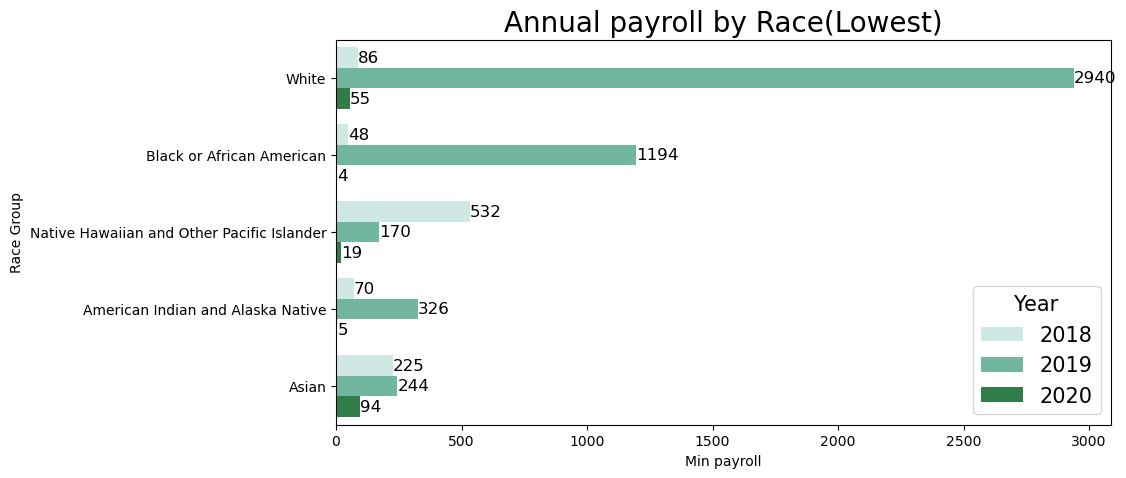

In [15]:
df_merge = df_merge[(df_merge['Annual payroll'] !=0)]

f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = df_merge['Annual payroll'],
            y = df_merge['Race group label'],
            hue = df_merge['Year'],
            estimator=min,
            ci=None,
            orient='h',
            palette='BuGn'
            ).set(xlabel='Min payroll',
                  ylabel='Race Group')

for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=12)
ax.set_title('Annual payroll by Race(Lowest)', fontsize=20)
ax.legend(title='Year', fontsize=15, title_fontsize=15)

In [17]:
fig=px.treemap(df_merge,path=['Race group label','Year'],
               values='Number of employees',
               color_continuous_scale='RdBu',
               color='Number of employees',
               width= 1000,
               height=500
               )

fig.update_layout(title_text='Number of Employees by Race', title_x=.5)
fig.show()